# Chicago Crime Data

## Import Necessary Libraries

In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import datetime as dt

# Permanently changes the pandas settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 7)

from sklearn import set_config
set_config(display='diagram')

# display values with two decimal places and comma separation for powers of thousands.
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

## Load the Data

In [2]:
# Import the data
path = '/Users/whitefreeze/Documents/GitHub/Chicago-Crime-Data/Data/Chicago/Crimes_-_2001_to_Present.csv'
df_OE = pd.read_csv(path)
df_OE.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.00,8.00,44.00,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.00,15.00,63.00,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11243268,JB167760,01/01/2017 12:01:00 AM,047XX N CLARK ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,1913,19.00,47.00,3.00,17,NaN,NaN,2017,09/13/2018 03:56:52 PM,NaN,NaN,NaN
3,1896258,G749215,12/15/2001 02:00:00 AM,011XX N STATE ST,0460,BATTERY,SIMPLE,STREET,False,False,1824,18.00,NaN,NaN,08B,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,811,8.00,23.00,56.00,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [3]:
df = df_OE.copy()

## Prepare DataFrame

In [4]:
# Specify shape of dataframe (long)
df_long = df

In [5]:
# Convert date into the datetime datatype
df_long['Date'] = pd.to_datetime(df_long['Date'])
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7863375 entries, 0 to 7863374
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            object        
 19  

In [6]:
# Make 'Date' the index
df_long = df_long.set_index('Date')
df_long

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-01 00:01:00,11646166,JC213529,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.00,8.00,44.00,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2016-05-01 00:25:00,11645836,JC212333,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.00,15.00,63.00,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2017-01-01 00:01:00,11243268,JB167760,047XX N CLARK ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,1913,19.00,47.00,3.00,17,NaN,NaN,2017,09/13/2018 03:56:52 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28 18:00:00,13129823,JG328250,059XX S KEELER AVE,0810,THEFT,OVER $500,STREET,False,False,813,8.00,13.00,65.00,06,"1,149,387.00","1,864,869.00",2023,08/05/2023 04:45:54 PM,41.79,-87.73,"(41.785117789, -87.727827896)"
2023-05-13 12:00:00,13128324,JG326502,020XX W CERMAK RD,1120,DECEPTIVE PRACTICE,FORGERY,CURRENCY EXCHANGE,False,False,1234,12.00,25.00,31.00,10,"1,163,211.00","1,889,404.00",2023,08/05/2023 04:45:54 PM,41.85,-87.68,"(41.85216632, -87.676455032)"
2023-06-20 04:00:00,13129172,JG327619,028XX N MAPLEWOOD AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,True,1411,14.00,35.00,21.00,08B,"1,158,868.00","1,918,755.00",2023,08/05/2023 04:45:54 PM,41.93,-87.69,"(41.932798095, -87.691589364)"


In [7]:
# Create sample dataframe to test code on
df_long_sample = df_long.sample(n = 1000, random_state = 42)

## Comparing Police Districts:
Which district has the most crimes? Which has the least?


In [8]:
# Sort & count districts by total number of crimes
pd.set_option('display.max_rows', 24)
display(df_long['District'].value_counts().sort_values(ascending=False))
pd.reset_option('display.max_rows')

8.00     528106
11.00    504195
6.00     459892
7.00     453766
25.00    447029
4.00     446471
3.00     398782
12.00    390253
9.00     383920
2.00     372694
19.00    353566
18.00    353146
5.00     348163
10.00    338841
15.00    336305
1.00     318911
14.00    304040
16.00    263410
22.00    257611
24.00    237806
17.00    226906
20.00    139264
31.00       247
21.00         4
Name: District, dtype: int64

* We can see that the district with the most crimes is District #8 with 528,106 crimes.
* We can see that the district with the least crimes is District #21 with 4 crimes.

## Crimes Across the Years:
Is the total number of crimes increasing or decreasing across the years?

Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?


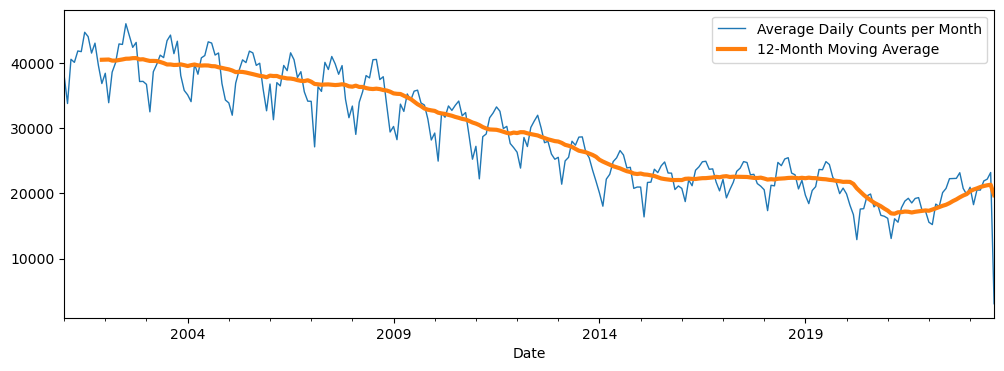

In [35]:
# Resample data to find Average Daily Crime Count per Month
df_ts = df_long.resample('MS').size()

# Rolling average over a number of months
window = 12
df_ts_mean = df_ts.rolling(window).mean()

# Plot Average Daily Counts per Month & Moving Average
ax = df_ts.plot(label='Average Daily Counts per Month', lw=1, figsize=(12,4))
df_ts_mean.plot(label=f'{window}-Month Moving Average', ax=ax, lw=3)
ax.legend();

We can see that the total number of crimes has been decreasing from 2003 to 2021. After 2021, there seems to be a slight rebound in crime, back to 2015-2019 levels, after a dip for about two years during 2020-2021.

### Individual Crime Trends: Code Testing

In [10]:
df_long_sample.groupby("Primary Type").size().head()

Primary Type
ASSAULT                               75
BATTERY                              175
BURGLARY                              45
CONCEALED CARRY LICENSE VIOLATION      2
CRIM SEXUAL ASSAULT                    8
dtype: int64

In [11]:

CRIMES = {}

crime = 'BATTERY'
crime

'BATTERY'

In [12]:
temp = df_long_sample.loc[ df_long_sample["Primary Type"] == crime]
temp.head(3)

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-09 00:48:00,12788154,JF349735,014XX W 81ST ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,612,6.00,21.00,71.00,08B,"1,167,968.00","1,851,030.00",2022,01/03/2023 03:46:28 PM,41.75,-87.66,"(41.746762491, -87.660098661)"
2006-09-03 01:37:00,4968053,HM578643,052XX S KILBOURN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,815,8.00,23.00,57.00,08B,"1,147,252.00","1,869,458.00",2006,02/10/2018 03:50:01 PM,41.80,-87.74,"(41.797751725, -87.735538862)"
2017-09-03 23:35:00,11076611,JA417891,051XX W FULLERTON AVE,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,ALLEY,False,False,2522,25.00,31.00,19.00,04B,"1,141,635.00","1,915,471.00",2017,02/10/2018 03:50:01 PM,41.92,-87.76,"(41.924122962, -87.755001006)"


In [13]:
temp_res = temp.resample("D").size()
temp_res

Date
2001-01-04    1
2001-01-05    0
2001-01-06    0
2001-01-07    0
2001-01-08    0
             ..
2023-05-11    0
2023-05-12    0
2023-05-13    0
2023-05-14    0
2023-05-15    1
Freq: D, Length: 8167, dtype: int64

In [14]:
CRIMES[crime] = temp_res.copy()
CRIMES.keys()

dict_keys(['BATTERY'])

In [15]:
CRIMES['BATTERY']

Date
2001-01-04    1
2001-01-05    0
2001-01-06    0
2001-01-07    0
2001-01-08    0
             ..
2023-05-11    0
2023-05-12    0
2023-05-13    0
2023-05-14    0
2023-05-15    1
Freq: D, Length: 8167, dtype: int64

### Individual Crime Trends: Full Data

In [16]:
# 1. get list of unique crime descriptions
crime_list = df_long["Primary Type"].unique()
crime_list

array(['THEFT', 'DECEPTIVE PRACTICE', 'SEX OFFENSE', 'BATTERY',
       'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE',
       'PUBLIC PEACE VIOLATION', 'CRIM SEXUAL ASSAULT', 'BURGLARY',
       'LIQUOR LAW VIOLATION', 'CRIMINAL SEXUAL ASSAULT',
       'OFFENSE INVOLVING CHILDREN', 'CRIMINAL TRESPASS',
       'WEAPONS VIOLATION', 'ROBBERY', 'MOTOR VEHICLE THEFT', 'ASSAULT',
       'OBSCENITY', 'INTERFERENCE WITH PUBLIC OFFICER',
       'HUMAN TRAFFICKING', 'ARSON', 'GAMBLING', 'PROSTITUTION',
       'NON-CRIMINAL', 'INTIMIDATION', 'STALKING', 'KIDNAPPING',
       'CONCEALED CARRY LICENSE VIOLATION', 'HOMICIDE',
       'OTHER NARCOTIC VIOLATION', 'RITUALISM', 'PUBLIC INDECENCY',
       'NON - CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'DOMESTIC VIOLENCE'], dtype=object)

In [17]:
# 2. Create an empty dictionary  
CRIMES = {}

In [18]:
# 3. Loop through the list of crimes
for crime in crime_list:
    
    # I. Save a temp df of just the rows that match the crime
   temp = df_long.loc[ df_long["Primary Type"]==crime].copy()

    # II. Resample the temp DataFrame as Daily data (crime counts) 
    # and keep ONLY the .size() 
   temp_res = temp.resample("D").size() 

   # III. Save the temporary DataFrame in the dictionary,
   # using the crime description as the key.
   CRIMES[crime] = temp_res.copy() 
    
CRIMES.keys()

dict_keys(['THEFT', 'DECEPTIVE PRACTICE', 'SEX OFFENSE', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE', 'PUBLIC PEACE VIOLATION', 'CRIM SEXUAL ASSAULT', 'BURGLARY', 'LIQUOR LAW VIOLATION', 'CRIMINAL SEXUAL ASSAULT', 'OFFENSE INVOLVING CHILDREN', 'CRIMINAL TRESPASS', 'WEAPONS VIOLATION', 'ROBBERY', 'MOTOR VEHICLE THEFT', 'ASSAULT', 'OBSCENITY', 'INTERFERENCE WITH PUBLIC OFFICER', 'HUMAN TRAFFICKING', 'ARSON', 'GAMBLING', 'PROSTITUTION', 'NON-CRIMINAL', 'INTIMIDATION', 'STALKING', 'KIDNAPPING', 'CONCEALED CARRY LICENSE VIOLATION', 'HOMICIDE', 'OTHER NARCOTIC VIOLATION', 'RITUALISM', 'PUBLIC INDECENCY', 'NON - CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'DOMESTIC VIOLENCE'])

In [19]:
# Test a single type
CRIMES['BATTERY']

Date
2001-01-01    296
2001-01-02    143
2001-01-03    165
2001-01-04    173
2001-01-05    178
             ... 
2023-07-31    127
2023-08-01    132
2023-08-02    117
2023-08-03    114
2023-08-04    114
Freq: D, Length: 8251, dtype: int64

In [20]:
crimes_df = pd.DataFrame(CRIMES)
crimes_df

,THEFT,DECEPTIVE PRACTICE,SEX OFFENSE,BATTERY,CRIMINAL DAMAGE,NARCOTICS,OTHER OFFENSE,PUBLIC PEACE VIOLATION,CRIM SEXUAL ASSAULT,BURGLARY,LIQUOR LAW VIOLATION,CRIMINAL SEXUAL ASSAULT,OFFENSE INVOLVING CHILDREN,CRIMINAL TRESPASS,WEAPONS VIOLATION,ROBBERY,MOTOR VEHICLE THEFT,ASSAULT,OBSCENITY,INTERFERENCE WITH PUBLIC OFFICER,HUMAN TRAFFICKING,ARSON,GAMBLING,PROSTITUTION,NON-CRIMINAL,INTIMIDATION,STALKING,KIDNAPPING,CONCEALED CARRY LICENSE VIOLATION,HOMICIDE,OTHER NARCOTIC VIOLATION,RITUALISM,PUBLIC INDECENCY,NON - CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),DOMESTIC VIOLENCE
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,412,94,65,296,233,97,167,5,38.00,66,3.00,3,100,29,32,41,60,70,NaN,1.00,NaN,NaN,2.00,5.00,NaN,1.00,1,2.00,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-02,221,78,4,143,118,175,101,2,2.00,68,2.00,0,4,35,9,35,65,66,NaN,1.00,NaN,NaN,1.00,11.00,NaN,1.00,0,1.00,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,226,49,5,165,136,133,96,7,7.00,57,2.00,0,3,35,7,51,72,79,NaN,0.00,NaN,1.00,0.00,16.00,NaN,0.00,1,3.00,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,243,42,1,173,133,142,96,3,2.00,55,4.00,0,5,29,9,55,87,57,NaN,3.00,NaN,1.00,2.00,19.00,NaN,1.00,0,2.00,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,265,53,2,178,142,185,90,5,6.00,55,8.00,0,9,29,6,55,86,68,NaN,2.00,NaN,3.00,0.00,16.00,NaN,0.00,0,3.00,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31,167,21,3,127,105,14,48,2,NaN,22,1.00,5,4,10,21,31,86,65,NaN,1.00,NaN,2.00,NaN,NaN,NaN,0.00,0,0.00,0.00,3,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-01,175,34,3,132,104,11,29,4,NaN,18,1.00,5,3,13,30,46,97,58,NaN,1.00,NaN,3.00,NaN,NaN,NaN,1.00,1,1.00,1.00,2,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-02,137,51,2,117,120,12,42,1,NaN,29,0.00,4,8,18,22,36,70,71,NaN,1.00,NaN,1.00,NaN,NaN,NaN,NaN,0,0.00,1.00,4,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
crimes_df = crimes_df.fillna(0)
crimes_df

,THEFT,DECEPTIVE PRACTICE,SEX OFFENSE,BATTERY,CRIMINAL DAMAGE,NARCOTICS,OTHER OFFENSE,PUBLIC PEACE VIOLATION,CRIM SEXUAL ASSAULT,BURGLARY,LIQUOR LAW VIOLATION,CRIMINAL SEXUAL ASSAULT,OFFENSE INVOLVING CHILDREN,CRIMINAL TRESPASS,WEAPONS VIOLATION,ROBBERY,MOTOR VEHICLE THEFT,ASSAULT,OBSCENITY,INTERFERENCE WITH PUBLIC OFFICER,HUMAN TRAFFICKING,ARSON,GAMBLING,PROSTITUTION,NON-CRIMINAL,INTIMIDATION,STALKING,KIDNAPPING,CONCEALED CARRY LICENSE VIOLATION,HOMICIDE,OTHER NARCOTIC VIOLATION,RITUALISM,PUBLIC INDECENCY,NON - CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),DOMESTIC VIOLENCE
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,412,94,65,296,233,97,167,5,38.00,66,3.00,3,100,29,32,41,60,70,0.00,1.00,0.00,0.00,2.00,5.00,0.00,1.00,1,2.00,0.00,2,0.00,0.00,0.00,0.00,0.00,0.00
2001-01-02,221,78,4,143,118,175,101,2,2.00,68,2.00,0,4,35,9,35,65,66,0.00,1.00,0.00,0.00,1.00,11.00,0.00,1.00,0,1.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00
2001-01-03,226,49,5,165,136,133,96,7,7.00,57,2.00,0,3,35,7,51,72,79,0.00,0.00,0.00,1.00,0.00,16.00,0.00,0.00,1,3.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00
2001-01-04,243,42,1,173,133,142,96,3,2.00,55,4.00,0,5,29,9,55,87,57,0.00,3.00,0.00,1.00,2.00,19.00,0.00,1.00,0,2.00,0.00,2,0.00,0.00,0.00,0.00,0.00,0.00
2001-01-05,265,53,2,178,142,185,90,5,6.00,55,8.00,0,9,29,6,55,86,68,0.00,2.00,0.00,3.00,0.00,16.00,0.00,0.00,0,3.00,0.00,1,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31,167,21,3,127,105,14,48,2,0.00,22,1.00,5,4,10,21,31,86,65,0.00,1.00,0.00,2.00,0.00,0.00,0.00,0.00,0,0.00,0.00,3,0.00,0.00,0.00,0.00,0.00,0.00
2023-08-01,175,34,3,132,104,11,29,4,0.00,18,1.00,5,3,13,30,46,97,58,0.00,1.00,0.00,3.00,0.00,0.00,0.00,1.00,1,1.00,1.00,2,0.00,0.00,0.00,0.00,0.00,0.00
2023-08-02,137,51,2,117,120,12,42,1,0.00,29,0.00,4,8,18,22,36,70,71,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0,0.00,1.00,4,0.00,0.00,0.00,0.00,0.00,0.00


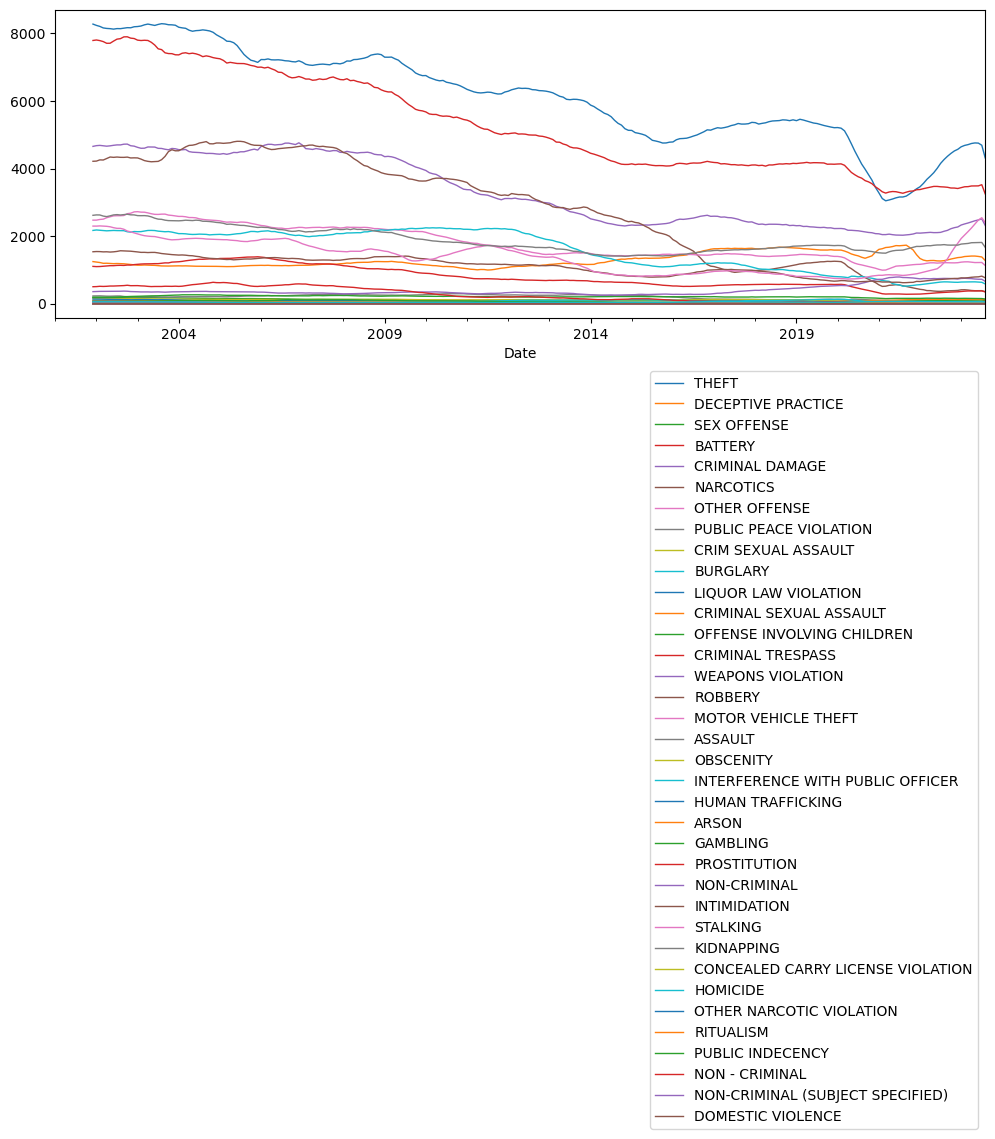

In [36]:
# Resample data to find Total Crime Count per Month
crimes_ts = crimes_df.resample('MS').sum()

# Rolling average over a number of months
window = 12
crimes_ts_mean = crimes_ts.rolling(window).mean()

# Total Crime Count per Month for each crime type
#ax = crimes_ts.plot(label='Total Crime Count per Month', lw=1)
ax = crimes_ts_mean.plot(label=f'{window}-Month Moving Average per Month', lw=1, figsize=(12,4))
ax.legend(bbox_to_anchor=[1,-0.15]);

While the visualization might be a little overwhelming, we can see two major trends:
1. The most frequent crime categories trend downwards over the time frame.
2. The less-frequent crimes appear to trend downwards or at least remain stable. Whether that is accurate for each category is not easily apparent, however less-frequent crimes do not trend upwards enough over time to be noticeable. 

There are two noticeable exceptions which appear to be Theft and one other, which made a resurgence from around 2021 to present. Outside of those two, crime rates appear to be stable/falling.

## Comparing Months:
What months have the most crime? What months have the least?

Are there any individual crimes that do not follow this pattern? If so, which crimes?


In [23]:
# Use previously resampled data to find Total Crime Count by Type per Month
# crimes_ts = crimes_df.resample('MS').sum()
crimes_ts

crime_sum = crimes_ts.sum(axis='columns')
crime_sum

Date
2001-01-01   38,119.00
2001-02-01   33,787.00
2001-03-01   40,566.00
2001-04-01   40,091.00
2001-05-01   41,839.00
                ...   
2023-04-01   20,520.00
2023-05-01   21,916.00
2023-06-01   22,196.00
2023-07-01   23,214.00
2023-08-01    3,101.00
Freq: MS, Length: 272, dtype: float64

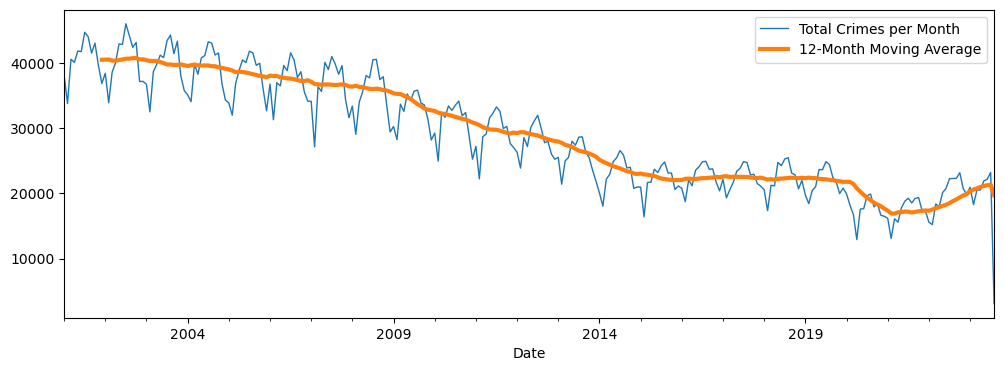

In [24]:
# Rolling average over a number of months
window = 12
crime_sum_mean = crime_sum.rolling(window).mean()

# Plot Average Daily Counts per Month & Moving Average
ax = crime_sum.plot(label='Total Crimes per Month', lw=1, figsize=[12,4])
crime_sum_mean.plot(label=f'{window}-Month Moving Average', ax=ax, lw=3)
ax.legend();

In [25]:
# Adjust number of rows displayed
pd.set_option('display.max_rows', 7)

# Create empty dataframe
crime_sum_piv = pd.DataFrame()

# Add features to make pivot plot to visualize
crime_sum_piv['crime_monthly_total'] = crime_sum
crime_sum_piv

,crime_monthly_total
Date,
2001-01-01,"38,119.00"
2001-02-01,"33,787.00"
2001-03-01,"40,566.00"
...,...
2023-06-01,"22,196.00"
2023-07-01,"23,214.00"
2023-08-01,"3,101.00"


In [26]:
# Add features to make pivot plot to visualize
crime_sum_piv['month'] = crime_sum_piv.index.month
crime_sum_piv

,crime_monthly_total,month
Date,,
2001-01-01,"38,119.00",1
2001-02-01,"33,787.00",2
2001-03-01,"40,566.00",3
...,...,...
2023-06-01,"22,196.00",6
2023-07-01,"23,214.00",7
2023-08-01,"3,101.00",8


In [27]:
# Add features to make pivot plot to visualize
crime_sum_piv['year'] = crime_sum_piv.index.year
crime_sum_piv

,crime_monthly_total,month,year
Date,,,
2001-01-01,"38,119.00",1,2001
2001-02-01,"33,787.00",2,2001
2001-03-01,"40,566.00",3,2001
...,...,...,...
2023-06-01,"22,196.00",6,2023
2023-07-01,"23,214.00",7,2023
2023-08-01,"3,101.00",8,2023


In [37]:
# Reference: http://atedstone.github.io/pandas-plot-seasons-time-series/

# Create empty dataframe for pivot table
crime_sum_plot = pd.DataFrame()

# Show all twelve months
pd.set_option('display.max_rows', 12)

# Create pivot table
crime_sum_plot = pd.pivot_table(crime_sum_piv, index=['month'], columns=['year'], values=['crime_monthly_total'])
crime_sum_plot

crime_monthly_total                                                    \
year                 2001      2002      2003      2004      2005      2006   
month                                                                         
1               38,119.00 38,422.00 36,723.00 35,112.00 33,875.00 36,769.00   
2               33,787.00 33,908.00 32,510.00 34,070.00 31,990.00 31,301.00   
3               40,566.00 38,588.00 38,652.00 39,857.00 36,907.00 36,983.00   
4               40,091.00 40,039.00 39,789.00 38,270.00 38,871.00 36,479.00   
5               41,839.00 42,913.00 41,197.00 40,781.00 40,473.00 39,617.00   
6               41,736.00 42,840.00 40,820.00 41,136.00 40,057.00 38,820.00   
7               44,702.00 46,013.00 43,418.00 43,239.00 41,811.00 41,555.00   
8               44,040.00 44,216.00 44,270.00 43,047.00 41,544.00 40,499.00   
9               41,514.00 42,391.00 41,427.00 41,214.00 39,628.00 37,777.00   
10              43,036.00 43,146.00 43,330.00 41,529.00 39,961.00 38,661.00   
11              39,608.00 37,154.00 38,057.00 36,843.00 35,984.00 35,572.00   
12              36,848.00 37,177.00 35,791.00 34,323.00 32,671.00 34,146.00   

                                                                             \
year       2007      2008      2009      2010      2011      2012      2013   
month                                                                         
1     34,121.00 33,394.00 30,267.00 29,259.00 27,225.00 26,321.00 25,542.00   
2     27,139.00 29,052.00 28,240.00 24,956.00 22,239.00 23,886.00 21,419.00   
3     36,356.00 33,983.00 33,689.00 32,344.00 28,702.00 28,577.00 24,987.00   
4     35,641.00 35,602.00 32,575.00 31,677.00 29,115.00 27,190.00 25,539.00   
5     40,093.00 38,066.00 35,250.00 33,414.00 31,599.00 30,113.00 28,010.00   
6     38,996.00 37,707.00 34,282.00 32,729.00 32,322.00 31,097.00 27,395.00   
7     40,992.00 40,494.00 35,679.00 33,515.00 33,263.00 31,987.00 28,638.00   
8     39,850.00 40,542.00 35,833.00 34,164.00 32,602.00 30,055.00 28,670.00   
9     38,267.00 37,455.00 33,873.00 31,901.00 29,947.00 27,774.00 26,355.00   
10    39,597.00 37,891.00 33,546.00 32,402.00 30,282.00 27,988.00 25,484.00   
11    34,426.00 33,564.00 31,400.00 28,897.00 27,655.00 26,045.00 23,572.00   
12    31,609.00 29,419.00 28,191.00 25,247.00 27,027.00 25,242.00 21,868.00   

                                                                             \
year       2014      2015      2016      2017      2018      2019      2020   
month                                                                         
1     20,077.00 20,977.00 20,773.00 22,171.00 20,569.00 19,747.00 19,935.00   
2     18,047.00 16,407.00 18,753.00 19,324.00 17,367.00 18,439.00 18,199.00   
3     22,195.00 21,685.00 22,065.00 20,580.00 21,254.00 20,452.00 16,752.00   
4     22,937.00 21,736.00 21,183.00 21,709.00 21,163.00 21,039.00 12,922.00   
5     24,879.00 23,716.00 23,555.00 23,395.00 24,758.00 23,678.00 17,610.00   
6     25,459.00 23,197.00 24,083.00 23,876.00 24,258.00 23,637.00 17,668.00   
7     26,577.00 24,239.00 24,859.00 24,882.00 25,284.00 24,881.00 19,644.00   
8     25,900.00 24,826.00 24,931.00 24,745.00 25,481.00 24,435.00 19,914.00   
9     23,909.00 23,137.00 23,704.00 22,856.00 23,123.00 22,470.00 17,943.00   
10    24,008.00 23,109.00 23,766.00 22,934.00 22,858.00 21,724.00 18,441.00   
11    20,779.00 20,601.00 21,748.00 21,513.00 20,694.00 19,976.00 16,649.00   
12    20,985.00 21,150.00 20,396.00 21,115.00 22,011.00 20,819.00 16,509.00   

                                     
year       2021      2022      2023  
month                                
1     16,189.00 15,592.00 20,950.00  
2     13,097.00 15,231.00 18,283.00  
3     16,124.00 18,374.00 20,532.00  
4     15,591.00 17,997.00 20,520.00  
5     17,808.00 20,134.00 21,916.00  
6     18,829.00 20,774.00 22,196.00  
7     19,259.00 22,265.00 23,214.00  
8     18,548.00 22,284.00  3,101.00  
9     19,234.00 22,311.00     

In [50]:
# Get column names
list(crime_sum_plot.columns.values)

[('crime_monthly_total', 2001),
 ('crime_monthly_total', 2002),
 ('crime_monthly_total', 2003),
 ('crime_monthly_total', 2004),
 ('crime_monthly_total', 2005),
 ('crime_monthly_total', 2006),
 ('crime_monthly_total', 2007),
 ('crime_monthly_total', 2008),
 ('crime_monthly_total', 2009),
 ('crime_monthly_total', 2010),
 ('crime_monthly_total', 2011),
 ('crime_monthly_total', 2012),
 ('crime_monthly_total', 2013),
 ('crime_monthly_total', 2014),
 ('crime_monthly_total', 2015),
 ('crime_monthly_total', 2016),
 ('crime_monthly_total', 2017),
 ('crime_monthly_total', 2018),
 ('crime_monthly_total', 2019),
 ('crime_monthly_total', 2020),
 ('crime_monthly_total', 2021),
 ('crime_monthly_total', 2022),
 ('crime_monthly_total', 2023)]

In [51]:
# Show last float value for 2023
display(crime_sum_plot.loc[8,('crime_monthly_total', 2023)])

# Nullify value for August 2023, as month's data is not complete
crime_sum_plot.loc[8,('crime_monthly_total', 2023)] = float('nan')

# Verify value updated to NaN
display(crime_sum_plot.loc[8,('crime_monthly_total', 2023)])

3101.0

nan

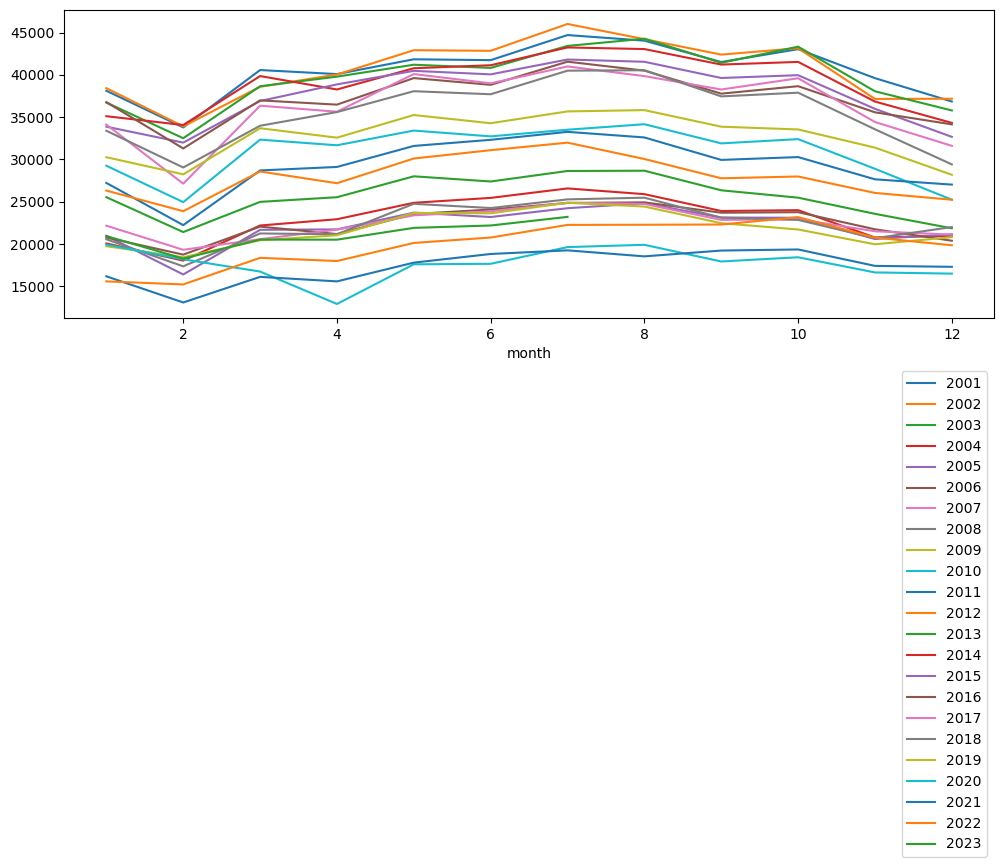

In [52]:
# Plot pivot table (after dropping partial value for August 2023)
ax = crime_sum_plot['crime_monthly_total'].plot(figsize=(12,4))
ax.legend(bbox_to_anchor=[1,-0.15]);

We can see that the least amount of crime appears to be in February (2), but then peaks in the late summer around July (7) and August (8). 